In [1]:
from collections import defaultdict
from tabulate import tabulate
from timeit import Timer
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [2]:
def gen_random_graph(size):
    G = nx.gnm_random_graph(size, size * 1.5, None, True)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(0, 10)
    return G


def floyd_warshall(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for v in G:
        dist[v][v] = 0
    
    for i, j, d in G.edges(data=True):
        w = d.get(weight)
        dist[i][j] = w
        pred[i][j] = i
        if undirected:
            dist[j][i] = w
            pred[j][i] = j
            
    for k in G:
        for i in G:
            for j in G:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]
                    
    return dict(pred), dict(dist)


def floyd_warshall_opt(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for v in G:
        dist[v][v] = 0
    
    for i, j, d in G.edges(data=True):
        w = d.get(weight)
        dist[i][j] = w
        pred[i][j] = i
        if undirected:
            dist[j][i] = w
            pred[j][i] = j
            
    for k in G:
        for i in G:
            if dist[i][k] != float('Inf'):
                for j in G:
                    if dist[k][j] != float('Inf'):
                        if dist[i][j] > dist[i][k] + dist[k][j]:
                            dist[i][j] = dist[i][k] + dist[k][j]
                            pred[i][j] = pred[k][j]
                    
    return dict(pred), dict(dist)


def reconstruct_path(source, target, predecessors):
    if source == target:
        return []
    
    prev = predecessors[source]
    curr = prev[target]
    path = [target, curr]
    
    while curr != source:
        curr = prev[curr]
        path.append(curr)
        
    return list(reversed(path))


def floyd_warshall_verbose(G, optimized=True, source=0, target=5):
    predecessors, distances = floyd_warshall_opt(G) if optimized else floyd_warshall(G)

    headers = ['v', 'predecessors']
    data = [(k, sorted(sorted(v.items()))) for k,v in sorted(predecessors.items())]
    print(tabulate(data, headers), "\n")

    headers = ['v', 'distances']
    data = [(k, sorted(sorted(dict(v).items()))) for k,v in sorted(distances.items())]
    print(tabulate(data, headers), "\n")

    print("Shortest path from", source, "to", target, "is", reconstruct_path(source, target, predecessors))

In [3]:
G = gen_random_graph(7)

headers = ["i","j","w"]
data = [(i, j, d['weight']) for (i, j, d) in G.edges(data=True)]
print(tabulate(data, headers))

  i    j    w
---  ---  ---
  0    1   10
  1    4    7
  2    0    8
  2    5   10
  3    0    5
  4    6    5
  5    4    0
  5    1    7
  6    2    8
  6    4    8
  6    1    8


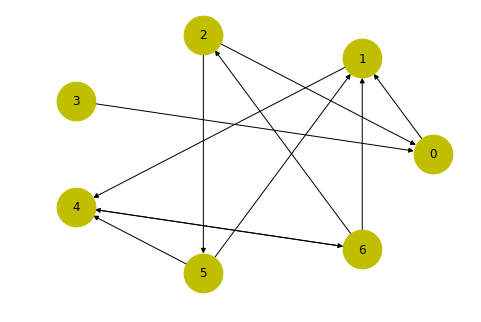

In [4]:
nx.draw_circular(G, with_labels=True, node_size=1500, node_color='y', alpha=1, arrows=True)

In [5]:
floyd_warshall_verbose(G, optimized=False, target=5)

  v  predecessors
---  ------------------------------------------------
  0  [(1, 0), (2, 6), (4, 1), (5, 2), (6, 4)]
  1  [(0, 2), (2, 6), (4, 1), (5, 2), (6, 4)]
  2  [(0, 2), (1, 5), (4, 5), (5, 2), (6, 4)]
  3  [(0, 3), (1, 0), (2, 6), (4, 1), (5, 2), (6, 4)]
  4  [(0, 2), (1, 6), (2, 6), (5, 2), (6, 4)]
  5  [(0, 2), (1, 5), (2, 6), (4, 5), (6, 4)]
  6  [(0, 2), (1, 6), (2, 6), (4, 6), (5, 2)] 

  v  distances
---  ---------------------------------------------------------------
  0  [(0, 0), (1, 10), (2, 30), (3, inf), (4, 17), (5, 40), (6, 22)]
  1  [(0, 28), (1, 0), (2, 20), (3, inf), (4, 7), (5, 30), (6, 12)]
  2  [(0, 8), (1, 17), (2, 0), (3, inf), (4, 10), (5, 10), (6, 15)]
  3  [(0, 5), (1, 15), (2, 35), (3, 0), (4, 22), (5, 45), (6, 27)]
  4  [(0, 21), (1, 13), (2, 13), (3, inf), (4, 0), (5, 23), (6, 5)]
  5  [(0, 21), (1, 7), (2, 13), (3, inf), (4, 0), (5, 0), (6, 5)]
  6  [(0, 16), (1, 8), (2, 8), (3, inf), (4, 8), (5, 18), (6, 0)] 

Shortest path from 0 to 5 is [0, 1, 4,

In [6]:
floyd_warshall_verbose(G, optimized=True, target=5)

  v  predecessors
---  ------------------------------------------------
  0  [(1, 0), (2, 6), (4, 1), (5, 2), (6, 4)]
  1  [(0, 2), (2, 6), (4, 1), (5, 2), (6, 4)]
  2  [(0, 2), (1, 5), (4, 5), (5, 2), (6, 4)]
  3  [(0, 3), (1, 0), (2, 6), (4, 1), (5, 2), (6, 4)]
  4  [(0, 2), (1, 6), (2, 6), (5, 2), (6, 4)]
  5  [(0, 2), (1, 5), (2, 6), (4, 5), (6, 4)]
  6  [(0, 2), (1, 6), (2, 6), (4, 6), (5, 2)] 

  v  distances
---  ---------------------------------------------------------------
  0  [(0, 0), (1, 10), (2, 30), (3, inf), (4, 17), (5, 40), (6, 22)]
  1  [(0, 28), (1, 0), (2, 20), (3, inf), (4, 7), (5, 30), (6, 12)]
  2  [(0, 8), (1, 17), (2, 0), (3, inf), (4, 10), (5, 10), (6, 15)]
  3  [(0, 5), (1, 15), (2, 35), (3, 0), (4, 22), (5, 45), (6, 27)]
  4  [(0, 21), (1, 13), (2, 13), (3, inf), (4, 0), (5, 23), (6, 5)]
  5  [(0, 21), (1, 7), (2, 13), (3, inf), (4, 0), (5, 0), (6, 5)]
  6  [(0, 16), (1, 8), (2, 8), (3, inf), (4, 8), (5, 18), (6, 0)] 

Shortest path from 0 to 5 is [0, 1, 4,

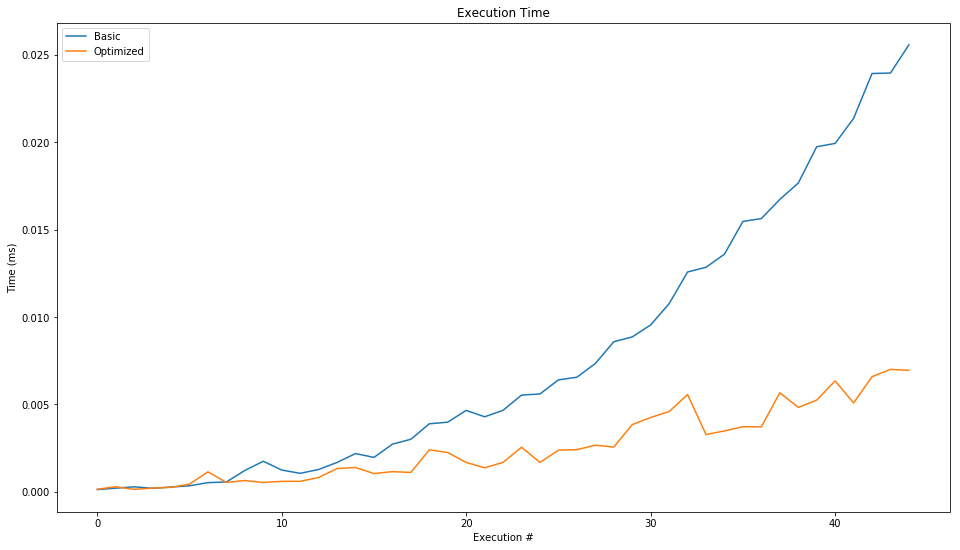

In [7]:
tr = []
tp = []

for i in range(5, 50):
    G = gen_random_graph(i)
    
    rd = Timer(lambda: floyd_warshall(G))
    rt = rd.repeat(repeat=1,number=1)
    tr.append(np.mean(rt))

    rk = Timer(lambda: floyd_warshall_opt(G))
    rt = rk.repeat(repeat=1,number=1)
    tp.append(np.mean(rt))
    
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(tr, label="Basic")
plt.plot(tp, label="Optimized")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()